## Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

# Business Case:-Based on given features we need to find Fight Fare 

In [1110]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [1111]:
# Loading the data
data=pd.read_excel("Flight_Fare.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis:

#### 1) Airlines:
An organization that provides regular public air transportation on one or more routes. The service allows travelers to search multiple carriers' flight schedules. This column includes various types of airlines, such as Indigo, Jet Airways, and Air India, among others.

#### 2) Date_of_Journey:
This column is going to notify us of the date the passenger's travel will begin.

#### 3) Source:
This column contains the name of the location from which the passenger's journey will begin.

#### 4) Destination:
This column includes the name of the location to which the passengers wish to travel.

#### 5) Route:
In this column, we can learn about the path that travelers have chosen to take from their origin to their destination.

#### 6) Dep_Time:
When the plane departs from the airport.

#### 7) Arrival_Time:
The arrival time is the time when the traveler will arrive at his or her destination.

#### 8) Duration:
The duration of a flight is the amount of time it takes to go from the starting point to the destination.

#### 9) Total_Stops:
This feature will tell us how many times flights will stop between the origin and destination during the entire voyage.

#### 10) Additional_Info:
We shall learn about eating, the types of food, and other facilities in this column.

#### 11) Price:
The cost of the flight for the entire voyage, including all charges before boarding.

## Besic check

In [1112]:
# Getting the first five rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1113]:
# Getting the last rows
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [1114]:
data.shape

(10683, 11)

## Task 1:- Prepare a complete data analysis report on the given data

In [1115]:
# To check data type and null values for all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1116]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [1117]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [1118]:
# It will give you info about numerical data/columns
data.describe(exclude="O")

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [1119]:
# It will give info about categorical data
data.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [1120]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [1121]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

##### Categorical data:

* Airline, Source, Destination, Route, Additional_info

#### Numerical data:

* Date_of_Journey, Dep_Time, Arrival_Time, Duration, Total_Stops

## Categorical date:

###  Bar chart showing top 10 most preferred Airline

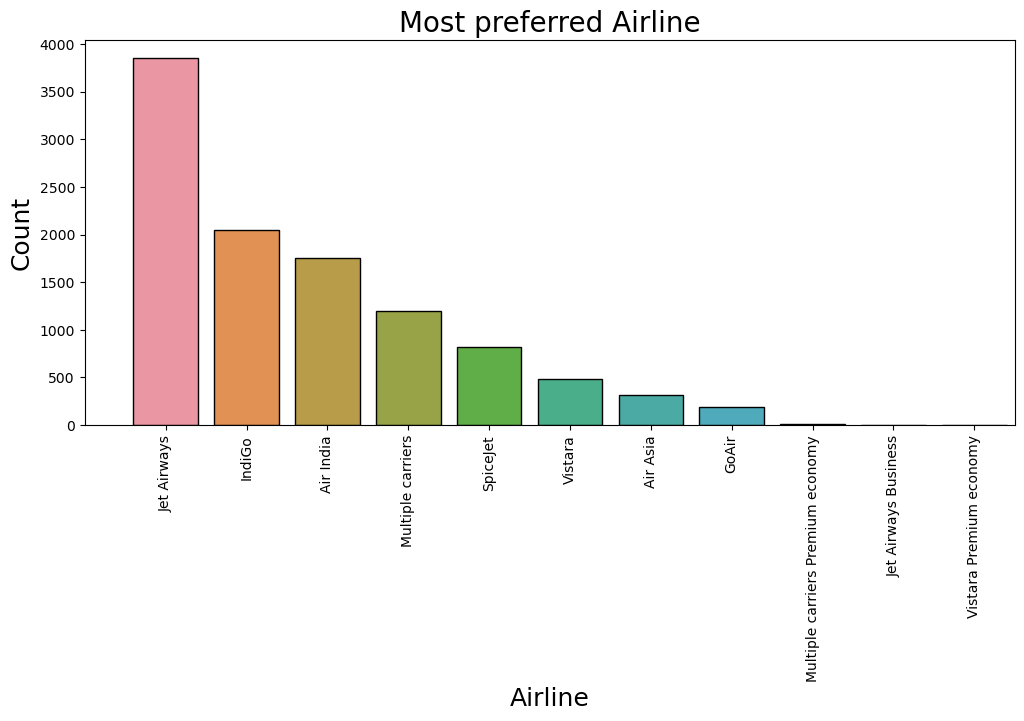

In [1122]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline",data=data,order=data["Airline"].value_counts().index,ec="black")
plt.title("Most preferred Airline", fontsize=20, color='black')
plt.xlabel("Airline",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.xlim(-1,10.5)
plt.show()

### Insight

- Jet Airways is the most preferred airline.
- Among all flight tickets sold, Jet Airways has the largest percentage, followed by Indigo.
- Jet Airways Business and Vistara Premium Economy are the least preferred airlines.
- The highest recommended airline has a count of 3850 (approx).

### Bar chart showing the most preffered Sorce

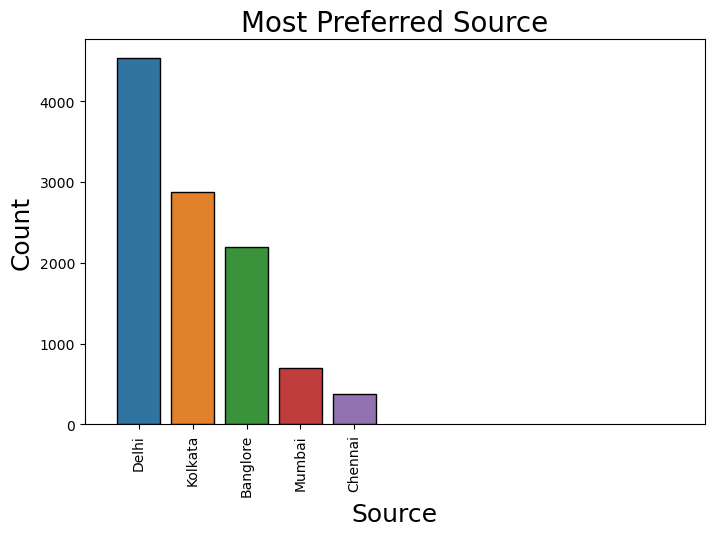

In [1123]:
plt.figure(figsize=(8,5))
sns.countplot(x="Source",data=data,order=data["Source"].value_counts().index,ec="black")
plt.title("Most Preferred Source",fontsize=20,color="black")
plt.xlabel("Source",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

### Insights

- This countplot indicates the most desired source (i.e., the name of the location from which the majority of the passenger's journey will begin).

- The most popular source is Delhi, which has a population of around 4000 people. Chennai is the last on the list.

### Bar chart showing the most preferred Destination 

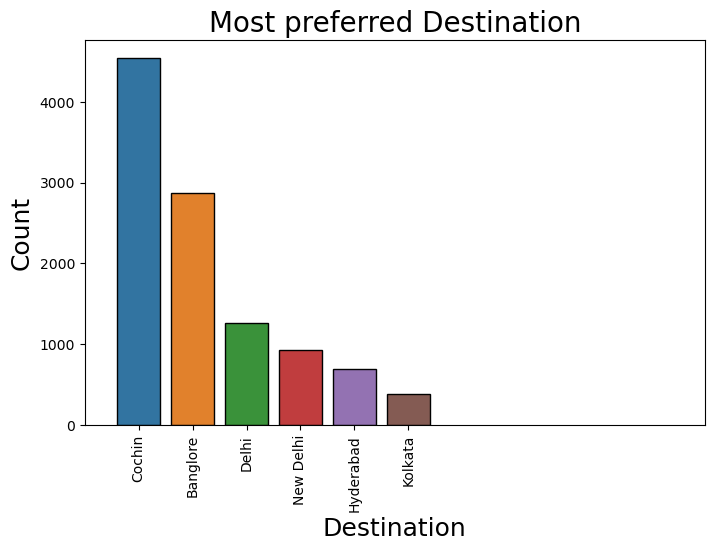

In [1124]:
plt.figure(figsize=(8,5))
sns.countplot(x="Destination",data=data,order=data["Destination"].value_counts().index,ec="black")
plt.title("Most preferred Destination",fontsize=20,color="black")
plt.xlabel("Destination",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

### Insights

- This countplot indicates the most chosen destination (i.e., the name of the location to which the majority of the passengers desired to travel).
- Once again, Cochin is the most popular destination, with over 4000 visitors. Kolkata is the last on the list.


### Bar Chart Showing top 30 most preferred Route

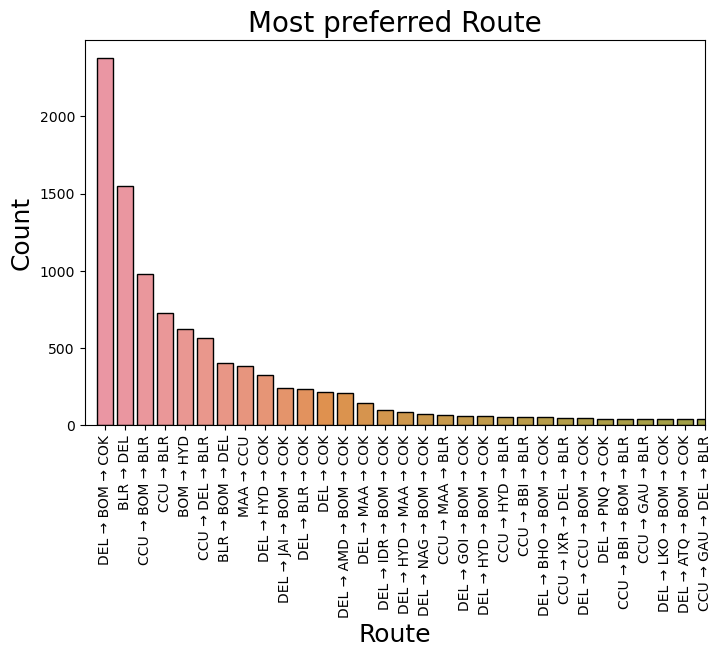

In [1125]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Route', data = data, order = data['Route'].value_counts().index, ec = 'black')
plt.title('Most preferred Route', fontsize = 20, color = 'black')
plt.xlabel('Route', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 30)
plt.show()

### Insights

- The most preferred Route is DEL→BOM→COK.
- Followed by BLR→DEL

### Bar chart showing about the Additional_Info

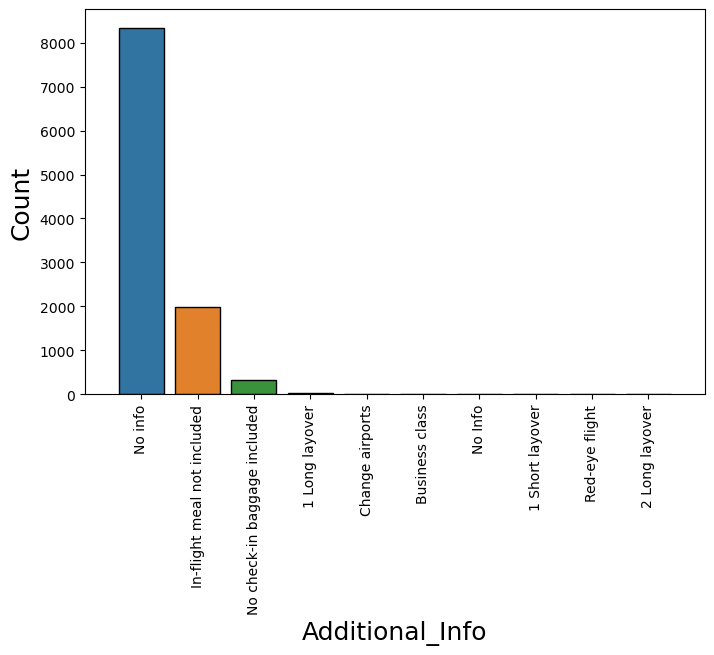

In [1126]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Additional_Info', data = data, order = data['Additional_Info'].value_counts().index, ec = 'black')
plt.xlabel('Additional_Info', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

### Insights

- In Additional_Info the highest count is 'No info'.
- And it is followed by In-flight meal not included.

## Numerical Date:

In [1127]:
# Creating a new dataframe with numerical variable only
data1=data[["Date_of_Journey","Dep_Time","Arrival_Time","Duration","Total_Stops"]]
data1

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop
1,1/05/2019,05:50,13:15,7h 25m,2 stops
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops
3,12/05/2019,18:05,23:30,5h 25m,1 stop
4,01/03/2019,16:50,21:35,4h 45m,1 stop
...,...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m,non-stop
10679,27/04/2019,20:45,23:20,2h 35m,non-stop
10680,27/04/2019,08:20,11:20,3h,non-stop
10681,01/03/2019,11:30,14:10,2h 40m,non-stop


### Histplot showing about the Numerical data

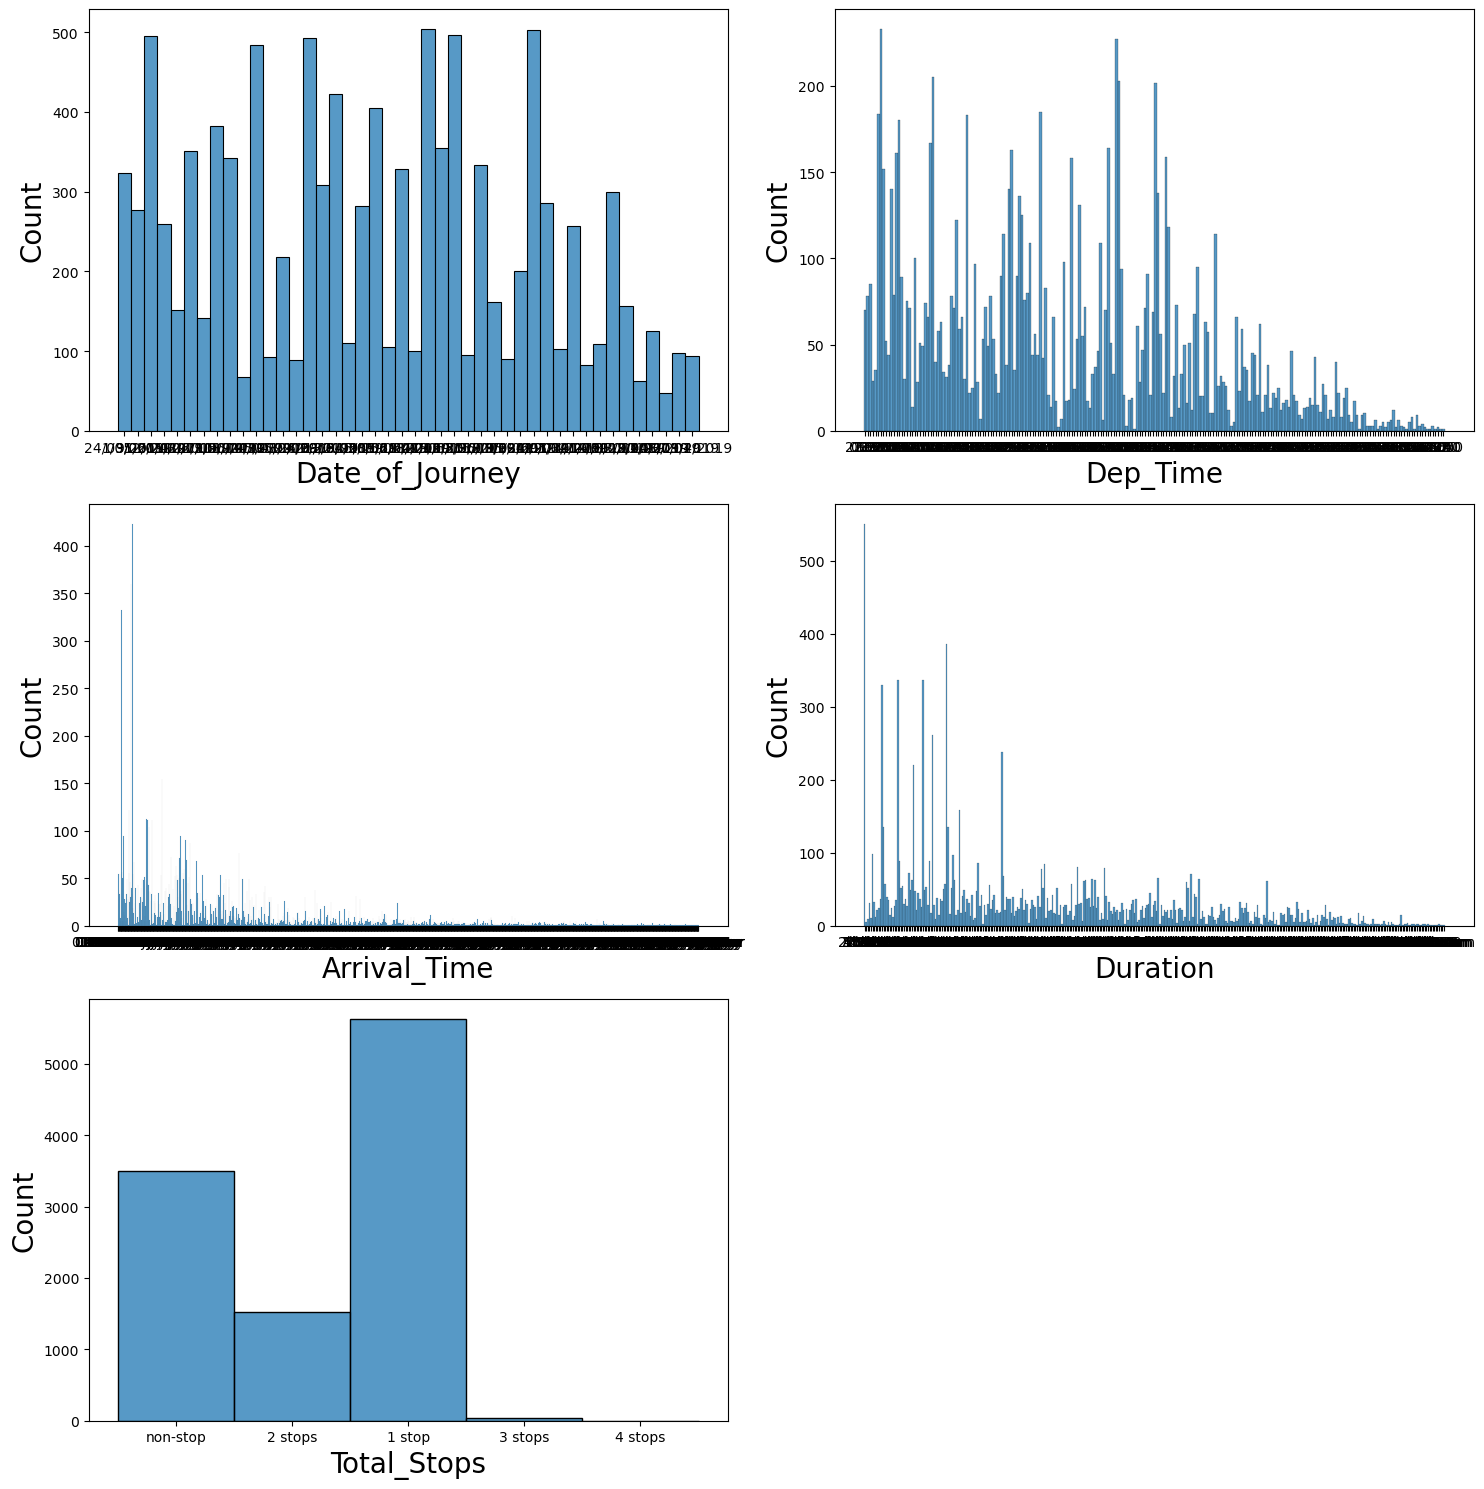

In [1128]:
plt.figure(figsize=(15,15))
plotnumber=1

for columns in data1:
    plt.subplot(3,2,plotnumber)
    sns.histplot(data[columns])
    plt.xlabel(columns,fontsize=20)
    plt.ylabel("Count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Insights

- As we can see from the graphs, the dataset is substantial and has 10,683 rows.
- Due to the fact that each passenger travels at a different time based on their preferences, departure Time, Arrival Time, and Duration all include numerous unique values.- As a result, the x labeling is overlapping, which prevents us from deriving the proper conclusions from this graph.
- While the date of travel and the number of stops have less unique value and make plotting simpler, we have learned from those.


### Histplot showing about the Most preferred Date of Journey

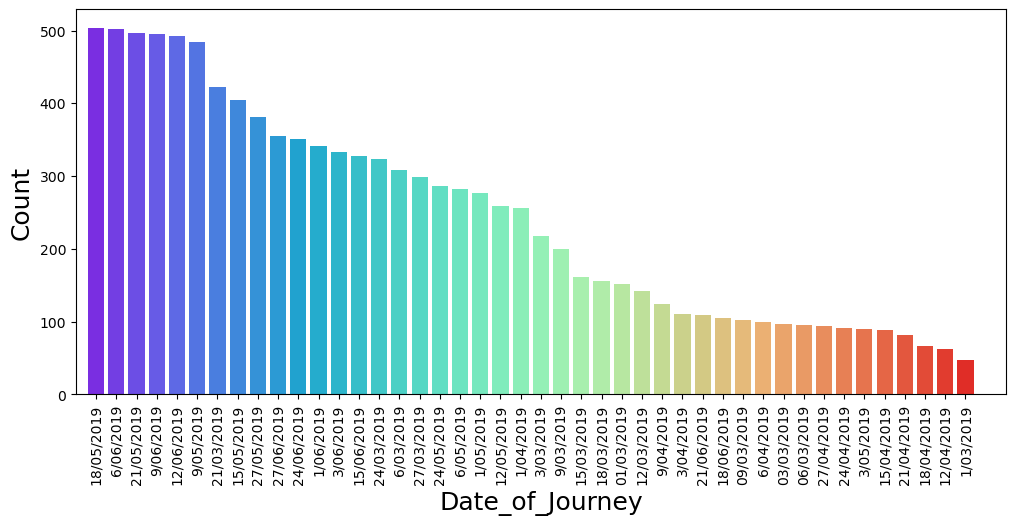

In [1129]:


# create a figure with a suitable size
plt.figure(figsize=(12,5))

# Define a rainbow color palette
rainbow_palette=sns.color_palette("rainbow",len(data['Date_of_Journey'].value_counts()))
#Create a countplot to visualize the frequency of flight on different datas
sns.countplot(x="Date_of_Journey",data=data,order=data["Date_of_Journey"].value_counts().index,palette=rainbow_palette)

# Set x-axis and y-axis labels
plt.xlabel("Date_of_Journey",fontsize=18)
plt.ylabel("Count",fontsize=18)

#Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# show the plot
plt.gca().invert_xaxis()

# limit the number of displayed dates on the x-axis if needed
plt.xlim(-1,45)

#Show the plot
plt.show()

### Insights

- The count of passengers travelling  at the date of 18/05/2019 and 6/06/2019 are approximately same are the highest.
- Followed by 21/05/2019, 9/06/2019 and 12/06/2019 approximately have the same count of passengers travelled in that date.
- The least count of passengers travelled is on 1/03/2019.

### Histplot showing about the count of the Total Stops

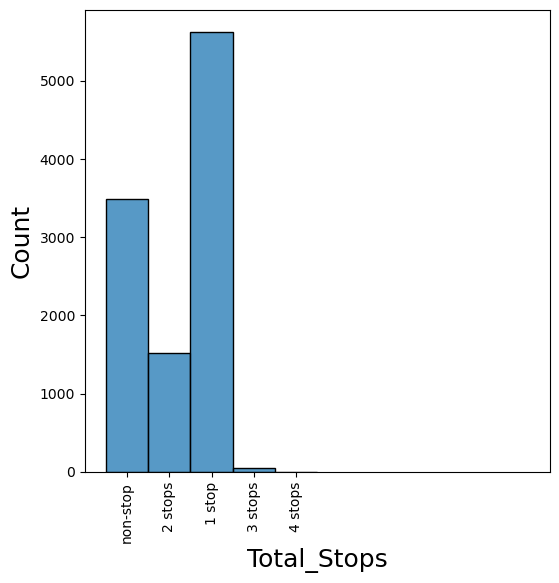

In [1130]:
plt.figure(figsize = (6, 6))
sns.histplot(x = 'Total_Stops', data = data,ec = 'black')
plt.xlabel('Total_Stops', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

### Insights

- One stop has the greatest count, followed by non-stop.
- Because non-stop travel saves time, passengers prefer it.
- But one stop is the most preferred.
- Four stops make up the least number of total stops.


## Bivariate Analysis

### Airline vs Flight Ticket Price

In [1131]:
Airlines=data.groupby('Airline').Price.max()
Airline_df=Airlines.to_frame().sort_values('Price',ascending=False)
Airline_df

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


### Bar plot showing Airline company Vs Flight Ticket Price

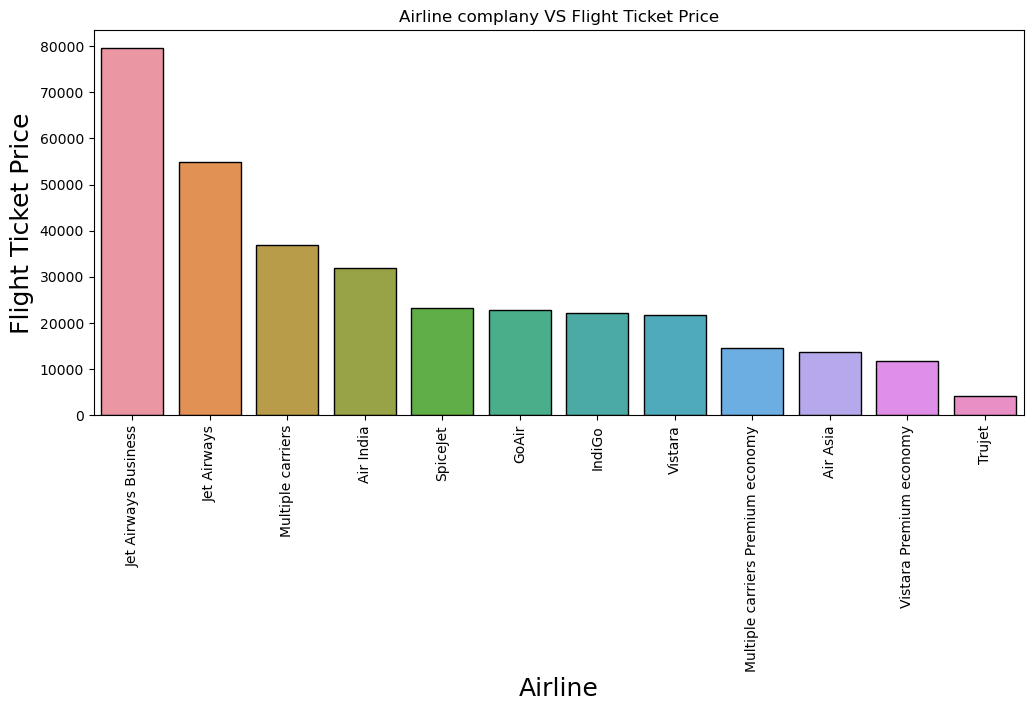

In [1132]:
plt.subplots(figsize=(12,5))
sns.barplot(x=Airline_df.index,y=Airline_df['Price'],ec='black')
plt.title('Airline complany VS Flight Ticket Price')
plt.xlabel("Airline",fontsize=18)
plt.ylabel('Flight Ticket Price',fontsize=18)
plt.xticks(rotation=90)
plt.show()

### Insights

- Based on the graph above, we can see that Jet Airways Business is the most expensive.

- It is the least popular airline, as we have already seen.

- Jet Airways follows it in order. Trujet is the least expensive airline, with a ticket costing around $1759.

- The most expensive ticket costs 79,512.


In [1133]:
data.Price.min()

1759

### Insights

* The Minumum Price of Flight Price is 1759

In [1134]:
data.Price.max()

79512

### Insights
* Maximum Price of Flight Price is 79512

### Price on weekdays VS Price on Weekends

In [1135]:
days_df=data[['Airline', 'Date_of_Journey', 'Price']]
days_df

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302
...,...,...,...
10678,Air Asia,9/04/2019,4107
10679,Air India,27/04/2019,4145
10680,Jet Airways,27/04/2019,7229
10681,Vistara,01/03/2019,12648


In [1136]:
days_df["Date_of_Journey"]=pd.to_datetime(days_df["Date_of_Journey"],format="%d/%m/%Y")
days_df["Weekdays"]=days_df["Date_of_Journey"].dt.day_name()
days_df["Weekend"]=days_df["Weekdays"].apply(lambda day: 1 if day=='Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekdays,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


### Barplot showing the Price on Weekdays VS Weekends

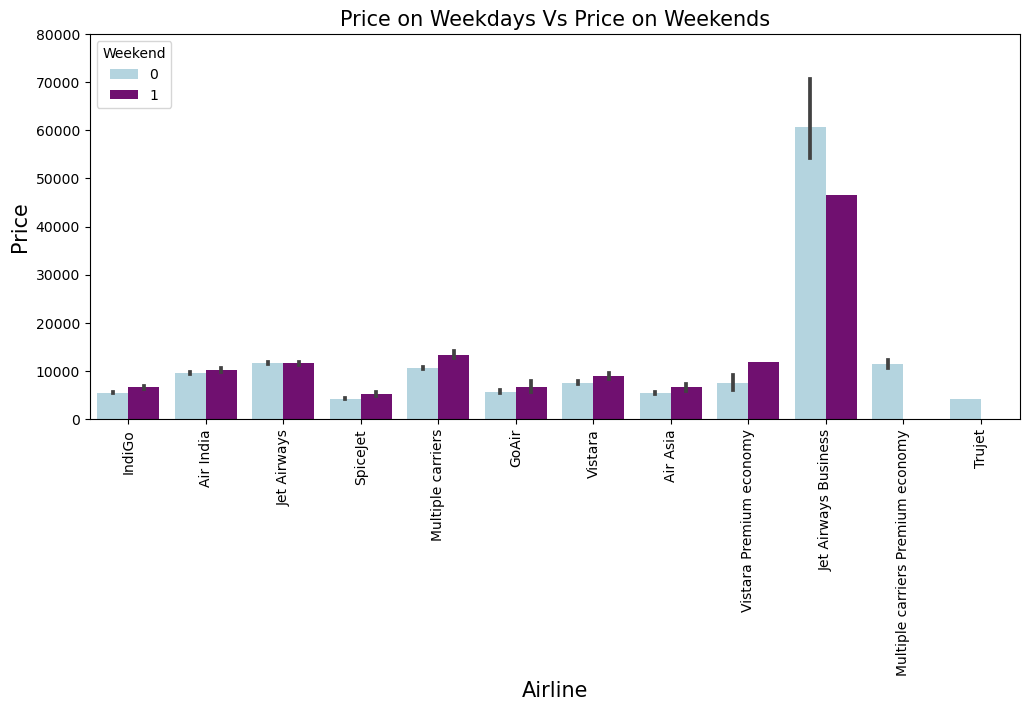

In [1137]:

# Create a subplot with a suitable size
plt.subplots(figsize=(12,5))

#map the 'weekend' columns to colors (1 to 'purple' and 0 to 'lightblue')
color_palette={1:'Purple',0:'lightblue'}

# Create a barplot using seaborn mapping 'weekend' to colors
sns.barplot(x='Airline',data=days_df,y='Price',hue='Weekend',palette=color_palette)

# Set the title, x-axis label, and y-axis label
plt.title('Price on Weekdays Vs Price on Weekends', fontsize=15, color='black')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the y-axis limit
plt.ylim(0, 80000)

# Show the plot
plt.show()

### Insights

Based on what we've seen, only Jet Airways Business, Multiple Carriers Premium Economy, and Trujet Airlines have higher ticket prices throughout the week than other airlines do on the weekend. We can infer that weekends have higher ticket prices.


## Handle Null Values

In [1138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Insights

Based on above description two features have null values that are 'Route' and 'Total_Stops' now we handle this null values so there only one null value in 'Route' as well as 'Total_Stops' if we remove this null values we don't have too much loss that why we are removing null values

In [1139]:
data.loc[data["Route"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [1140]:
data.drop(9039,axis=0,inplace=True)

# Date Preprocessing

## Feature Engineering

### Airline

In [1141]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [1142]:
data.Airline.dtype

dtype('O')

In [1143]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [1144]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [1145]:
df=pd.get_dummies(data["Airline"],drop_first=True)

In [1146]:
data=pd.concat([data,df],axis=1).drop(["Airline"],axis=1)

In [1147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Date_of_Journey                    10682 non-null  object
 1   Source                             10682 non-null  object
 2   Destination                        10682 non-null  object
 3   Route                              10682 non-null  object
 4   Dep_Time                           10682 non-null  object
 5   Arrival_Time                       10682 non-null  object
 6   Duration                           10682 non-null  object
 7   Total_Stops                        10682 non-null  object
 8   Additional_Info                    10682 non-null  object
 9   Price                              10682 non-null  int64 
 10  Air India                          10682 non-null  bool  
 11  GoAir                              10682 non-null  bool  
 12  IndiGo   

### Insights

In 'Airline' there are 12 unique values is there and 'Airline' has object type and this is nominal type of variable that why we used One-Hot encoder to convert object datatype to boolean type 

### Date_of_Journey

In [1148]:
data.Date_of_Journey.value_counts()

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

In [1149]:
data.Date_of_Journey.isnull().sum()

0

In [1150]:
data["Date_of_day"]=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day
data["Date_of_month"]=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [1151]:
data["Date_of_month"]=data["Date_of_month"].astype('int')
data["Date_of_day"]=data["Date_of_day"].astype('int')

In [1152]:
data.rename(columns={"Date_of_Journey":"Date_of_Travel"},inplace=True)

In [1153]:
data.drop("Date_of_Travel",axis=1,inplace=True)

In [1154]:
data["Date_of_month"].astype('int')
data["Date_of_day"].astype('int')

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_day, Length: 10682, dtype: int32

### Insights

'Date_of_Journey' is one of importent feature so it is in Date and Time format our model does not understanding this values we can split day,month,year and we can use 'to_datetime' function now i used to_datetime function we split day and month after that we have to remove Date_of_Journey' column

In [1155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Source                             10682 non-null  object
 1   Destination                        10682 non-null  object
 2   Route                              10682 non-null  object
 3   Dep_Time                           10682 non-null  object
 4   Arrival_Time                       10682 non-null  object
 5   Duration                           10682 non-null  object
 6   Total_Stops                        10682 non-null  object
 7   Additional_Info                    10682 non-null  object
 8   Price                              10682 non-null  int64 
 9   Air India                          10682 non-null  bool  
 10  GoAir                              10682 non-null  bool  
 11  IndiGo                             10682 non-null  bool  
 12  Jet Airwa

### Source

In [1156]:
data.columns

Index(['Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Date_of_day',
       'Date_of_month'],
      dtype='object')

In [1157]:
data.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [1158]:
data.Source.isnull().sum()

0

In [1159]:
Source=pd.get_dummies(data['Source'],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
...,...,...,...,...
10678,False,False,True,False
10679,False,False,True,False
10680,False,False,False,False
10681,False,False,False,False


In [1160]:
data=pd.concat([data,Source],axis=1).drop(["Source"],axis=1)

### Insights

In 'Source' feature there are 5 unique value so this is nominal datatype there is no order in that our model does not undestanding object type so we used One-Hoe encoder method and after we drop First column becouse if we remove first columns there is also unique that why if we remove nothing problem will happen

In [1161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Destination                        10682 non-null  object
 1   Route                              10682 non-null  object
 2   Dep_Time                           10682 non-null  object
 3   Arrival_Time                       10682 non-null  object
 4   Duration                           10682 non-null  object
 5   Total_Stops                        10682 non-null  object
 6   Additional_Info                    10682 non-null  object
 7   Price                              10682 non-null  int64 
 8   Air India                          10682 non-null  bool  
 9   GoAir                              10682 non-null  bool  
 10  IndiGo                             10682 non-null  bool  
 11  Jet Airways                        10682 non-null  bool  
 12  Jet Airwa

### Destination

In [1162]:
data.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [1163]:
data.Destination.isnull().sum()

0

In [1164]:
Destination=pd.get_dummies(data["Destination"],drop_first=True)

In [1165]:
data=pd.concat([data,Destination],axis=1).drop(['Destination'],axis=1)

### Insights

* Destination has 5 unique values and this is Nominal data
* we used One-Hot encoder method to convert object to boolean type

In [1166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Dep_Time                           10682 non-null  object
 2   Arrival_Time                       10682 non-null  object
 3   Duration                           10682 non-null  object
 4   Total_Stops                        10682 non-null  object
 5   Additional_Info                    10682 non-null  object
 6   Price                              10682 non-null  int64 
 7   Air India                          10682 non-null  bool  
 8   GoAir                              10682 non-null  bool  
 9   IndiGo                             10682 non-null  bool  
 10  Jet Airways                        10682 non-null  bool  
 11  Jet Airways Business               10682 non-null  bool  
 12  Multiple 

### Dep_Time

In [1167]:
data["Dep_hour"]=pd.to_datetime(data.Dep_Time).dt.hour
data["Dep_minute"]=pd.to_datetime(data.Dep_Time).dt.minute

In [1168]:
data.drop('Dep_Time',axis=1,inplace=True)

In [1169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Arrival_Time                       10682 non-null  object
 2   Duration                           10682 non-null  object
 3   Total_Stops                        10682 non-null  object
 4   Additional_Info                    10682 non-null  object
 5   Price                              10682 non-null  int64 
 6   Air India                          10682 non-null  bool  
 7   GoAir                              10682 non-null  bool  
 8   IndiGo                             10682 non-null  bool  
 9   Jet Airways                        10682 non-null  bool  
 10  Jet Airways Business               10682 non-null  bool  
 11  Multiple carriers                  10682 non-null  bool  
 12  Multiple 

### Insights

* Dep-Time is one of the Date and Time format so we can split or use to_datetime function
* we used to_datetime function we got Dep_Time and Dep_hour seperate columns
* then Drop Dep_Time column

### Arrival_Time

In [1170]:
data.Arrival_Time.value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [1171]:
data.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [1172]:
data.Arrival_Time.isnull().sum()

0

In [1173]:
data["Arrival_hour"]=pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_minute"]=pd.to_datetime(data.Arrival_Time).dt.minute

In [1174]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [1175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Duration                           10682 non-null  object
 2   Total_Stops                        10682 non-null  object
 3   Additional_Info                    10682 non-null  object
 4   Price                              10682 non-null  int64 
 5   Air India                          10682 non-null  bool  
 6   GoAir                              10682 non-null  bool  
 7   IndiGo                             10682 non-null  bool  
 8   Jet Airways                        10682 non-null  bool  
 9   Jet Airways Business               10682 non-null  bool  
 10  Multiple carriers                  10682 non-null  bool  
 11  Multiple carriers Premium economy  10682 non-null  bool  
 12  SpiceJet 

### Insights

* Arrival_Time is also in date_time format and it is object type we used to_datetime function and convert object type to intiger type

### Total_stops

In [1176]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [1177]:
data.Total_Stops.isnull().sum()

0

In [1178]:
data["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [1179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Duration                           10682 non-null  object
 2   Total_Stops                        10682 non-null  int64 
 3   Additional_Info                    10682 non-null  object
 4   Price                              10682 non-null  int64 
 5   Air India                          10682 non-null  bool  
 6   GoAir                              10682 non-null  bool  
 7   IndiGo                             10682 non-null  bool  
 8   Jet Airways                        10682 non-null  bool  
 9   Jet Airways Business               10682 non-null  bool  
 10  Multiple carriers                  10682 non-null  bool  
 11  Multiple carriers Premium economy  10682 non-null  bool  
 12  SpiceJet 

### Insights

* Total_Stops feature has different stops, it is object type 
* there are different methods are there to convert object type to numerical type but we used mannual encoder method

### Additional_info

In [1180]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [1181]:
data["Additional_Info"].isnull().sum()

0

In [1182]:
data.drop("Additional_Info",axis=1,inplace=True)

In [1183]:
data

,Route,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,BLR → DEL,2h 50m,0,3897,False,False,True,False,False,False,...,False,False,False,False,False,True,22,20,1,10
1,CCU → IXR → BBI → BLR,7h 25m,2,7662,True,False,False,False,False,False,...,False,False,False,False,False,False,5,50,13,15
2,DEL → LKO → BOM → COK,19h,2,13882,False,False,False,True,False,False,...,False,True,False,False,False,False,9,25,4,25
3,CCU → NAG → BLR,5h 25m,1,6218,False,False,True,False,False,False,...,False,False,False,False,False,False,18,5,23,30
4,BLR → NAG → DEL,4h 45m,1,13302,False,False,True,False,False,False,...,False,False,False,False,False,True,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,2h 30m,0,4107,False,False,False,False,False,False,...,False,False,False,False,False,False,19,55,22,25
10679,CCU → BLR,2h 35m,0,4145,True,False,False,False,False,False,...,False,False,False,False,False,False,20,45,23,20
10680,BLR → DEL,3h,0,7229,False,False,False,True,False,False,...,False,False,True,False,False,False,8,20,11,20
10681,BLR → DEL,2h 40m,0,12648,False,False,False,False,False,False,...,False,False,False,False,False,True,11,30,14,10


### Insights

* Additional_info feature has different values in that but it has 8344 no_info values so in there is so many None value is there it is difficult to replace this value to mode
* we drop this columns we did'nt get much more information from this column

### Route

In [1184]:
data["Route"].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [1185]:
data["Route"].isnull().sum()

0

In [1186]:
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]


In [1187]:
data.drop('Route',axis=1,inplace=True)

In [1188]:
data.head()

,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,2h 50m,0,3897,False,False,True,False,False,False,False,...,True,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,7h 25m,2,7662,True,False,False,False,False,False,False,...,False,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,19h,2,13882,False,False,False,True,False,False,False,...,False,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,5h 25m,1,6218,False,False,True,False,False,False,False,...,False,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,4h 45m,1,13302,False,False,True,False,False,False,False,...,True,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [1189]:
data.isnull().sum()

Duration                                 0
Total_Stops                              0
Price                                    0
Air India                                0
GoAir                                    0
IndiGo                                   0
Jet Airways                              0
Jet Airways Business                     0
Multiple carriers                        0
Multiple carriers Premium economy        0
SpiceJet                                 0
Trujet                                   0
Vistara                                  0
Vistara Premium economy                  0
Date_of_day                              0
Date_of_month                            0
Chennai                                  0
Delhi                                    0
Kolkata                                  0
Mumbai                                   0
Cochin                                   0
Delhi                                    0
Hyderabad                                0
Kolkata    

In [1190]:
for i in ["Route3","Route4","Route5"]:
    data[i].fillna('None',inplace=True)

In [1191]:
data.isnull().sum()

Duration                             0
Total_Stops                          0
Price                                0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Date_of_day                          0
Date_of_month                        0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Dep_hour                 

In [1192]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in ["Route1","Route2","Route3","Route4","Route5"]:
    data[i]=encoder.fit_transform(data[i])

In [1193]:
data.head()

,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,2h 50m,0,3897,False,False,True,False,False,False,False,...,True,22,20,1,10,0,13,29,13,5
1,7h 25m,2,7662,True,False,False,False,False,False,False,...,False,5,50,13,15,2,25,1,3,5
2,19h,2,13882,False,False,False,True,False,False,False,...,False,9,25,4,25,3,32,4,5,5
3,5h 25m,1,6218,False,False,True,False,False,False,False,...,False,18,5,23,30,2,34,3,13,5
4,4h 45m,1,13302,False,False,True,False,False,False,False,...,True,16,50,21,35,0,34,8,13,5


### Insights

* Route column has different Route to reach the destination based on Route also we can predict Flight Price*
* Route is one importent feature we now we split that route into different column then only we can handle this 
* Some column has missing values Route3 has 3491 Route4 has 9116 Route5 has 10636 missing value because some Route has only 2 or 3 stops that why missing vlaue is there now we replace it with None values
* we used label_encoder method it give number to each value 
* ex:- DEL → BOM → COK it give number Alphabet voice BOM gave 0 number and DEL gave 1 like this it has given value

### Destination

In [1194]:
data["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [1195]:
data.Duration.value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [1196]:
def convert_duration(Duration):
    if len(Duration.split())==2:
         hours=int(Duration.split()[0][:-1])
        minutes=int(Duration.split()[1][:-1])
         return hours * 60 + minutes
    else:
        return int(Duration[:-1])*60

In [1197]:
data["Duration"]=data["Duration"].apply(convert_duration)

In [1198]:
data["Duration"].isnull().sum()

0

In [1199]:
data.isnull().sum()

Duration                             0
Total_Stops                          0
Price                                0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Date_of_day                          0
Date_of_month                        0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Dep_hour                 

In [1200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Duration                           10682 non-null  int64
 1   Total_Stops                        10682 non-null  int64
 2   Price                              10682 non-null  int64
 3   Air India                          10682 non-null  bool 
 4   GoAir                              10682 non-null  bool 
 5   IndiGo                             10682 non-null  bool 
 6   Jet Airways                        10682 non-null  bool 
 7   Jet Airways Business               10682 non-null  bool 
 8   Multiple carriers                  10682 non-null  bool 
 9   Multiple carriers Premium economy  10682 non-null  bool 
 10  SpiceJet                           10682 non-null  bool 
 11  Trujet                             10682 non-null  bool 
 12  Vistara                

In [1201]:
data.Duration

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

### Price

In [1202]:
data.Price

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

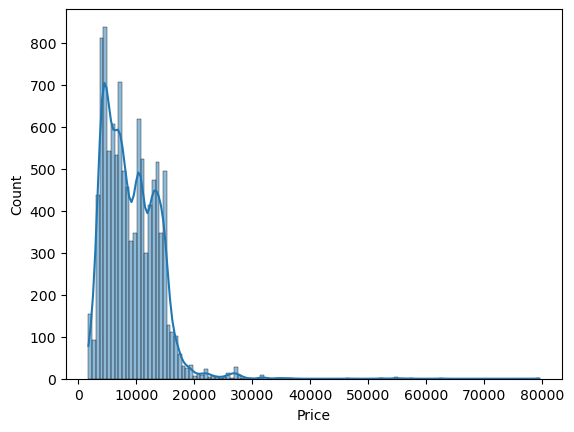

In [1203]:
sns.histplot(x=data["Price"],kde=True)

### Insights

* Price is skewed data we have to convert into normal distribution 

### Log,Square,Box Cox Transformation

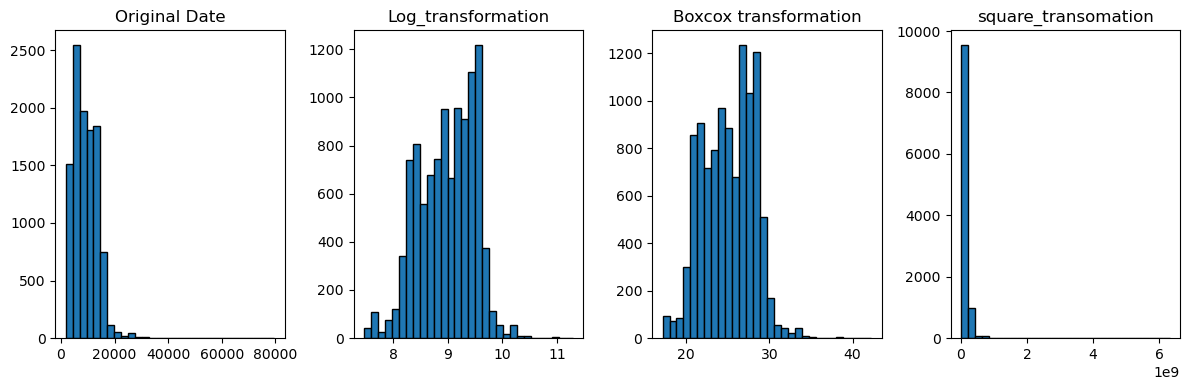

log_transformation p-value:NormaltestResult(statistic=226.88441928823795, pvalue=5.403489808048038e-50)
square_transformation p-value:NormaltestResult(statistic=44.521380968391725, pvalue=2.1493391993198757e-10)
boxcox_transformation p-value:NormaltestResult(statistic=21054.236006184125, pvalue=0.0)


In [1204]:
from scipy.stats import boxcox
from scipy.stats import normaltest

# Apply log_transformed
log_transformed_data=np.log(data["Price"])

# Apply Box-Cox transformed
boxcox_transformed_data,lambda_value=boxcox(data["Price"])

# Apply square transformed
square_transformed_data=np.square(data["Price"])

# check the normality of transformed data using normality test
p_value_log=normaltest(log_transformed_data)
p_value_boxcox=normaltest(boxcox_transformed_data)
p_value_square=normaltest(square_transformed_data)


#plot histogram of oroginal and transformed data
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.hist(data["Price"],bins=30,edgecolor='black')
plt.title("Original Date")

plt.subplot(1,4,2)
plt.hist(log_transformed_data,bins=30,edgecolor='black')
plt.title('Log_transformation')

plt.subplot(1,4,3)
plt.hist(boxcox_transformed_data,bins=30,edgecolor='black')
plt.title("Boxcox transformation")

plt.subplot(1,4,4)
plt.hist(square_transformed_data,bins=30,edgecolor='black')
plt.title("square_transomation")

plt.tight_layout()
plt.show()

print(f"log_transformation p-value:{p_value_log}")
print(f"square_transformation p-value:{p_value_boxcox}")
print(f"boxcox_transformation p-value:{p_value_square}")


### Insights

* Price is not noramally distributed we checked with log_transpormation and Boxcox, square transformation
* Log_transform is better then boxcox and square transform in that we got p value 0.05

Text(0.5, 1.0, 'Log_Tranformation')

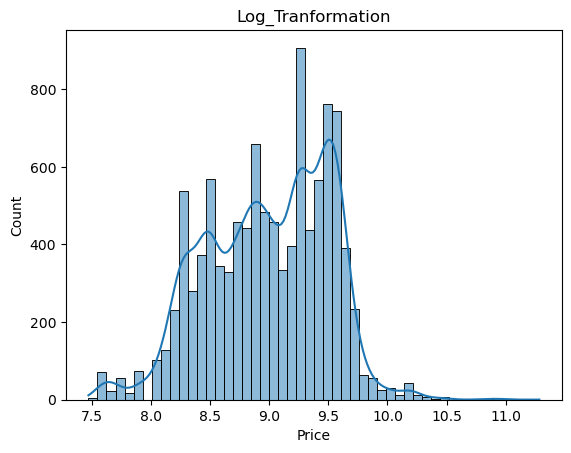

In [1205]:
data['Price']=np.log(data["Price"])
sns.histplot(data["Price"],kde=True)
plt.title("Log_Tranformation")

### Check Outlier

In [1206]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

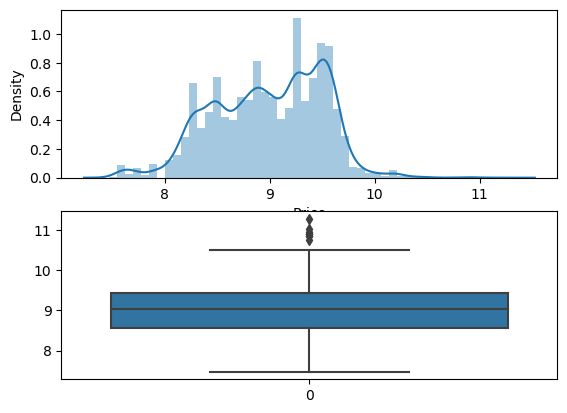

In [1207]:
plot(data,'Price')

## Feature Selection

In [1208]:
data.corr()

,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
Duration,1.000000,0.738204,0.595642,0.261689,-0.092159,-0.343547,0.305494,-0.011970,-0.012083,-0.002510,...,0.006715,0.002122,-0.019025,0.051555,-0.069567,0.289730,0.036453,-0.654858,-0.482068,-0.114427
Total_Stops,0.738204,1.000000,0.690628,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,...,-0.015302,-0.061476,-0.002618,0.038140,-0.106940,0.428918,0.162259,-0.800261,-0.729391,-0.207433
Price,0.595642,0.690628,1.000000,0.080001,-0.102757,-0.388862,0.444188,0.090928,0.176421,0.023392,...,0.152892,-0.005502,-0.052019,0.058871,-0.108706,0.258685,-0.092926,-0.700962,-0.340142,-0.058377
Air India,0.261689,0.271094,0.080001,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,...,0.053072,-0.012879,-0.045688,0.088872,0.061231,-0.007952,0.156370,-0.036504,-0.395179,-0.114345
GoAir,-0.092159,-0.060110,-0.102757,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,...,0.017573,-0.016373,0.076751,0.018526,0.096839,-0.066119,-0.046077,0.040626,0.055727,0.008733
IndiGo,-0.343547,-0.302991,-0.388862,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,...,-0.018626,-0.023395,-0.014714,-0.071491,0.035124,-0.041125,0.062839,0.288130,0.187449,0.031318
Jet Airways,0.305494,0.215063,0.444188,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,-0.026199,...,0.056782,0.113942,0.024455,-0.027377,-0.057698,-0.045845,-0.085982,-0.304316,-0.056601,0.048190
Jet Airways Business,-0.011970,0.017876,0.090928,-0.010497,-0.003224,-0.011563,-0.017793,1.000000,-0.008418,-0.000828,...,0.048675,-0.007524,0.009168,-0.014456,0.005232,-0.020035,-0.007594,-0.013771,-0.011731,0.001522
Multiple carriers,-0.012083,0.118399,0.176421,-0.157223,-0.048292,-0.173196,-0.266497,-0.008418,1.000000,-0.012395,...,-0.109782,-0.149992,-0.109370,0.067930,-0.167455,0.288677,-0.130123,-0.219070,0.103596,-0.013201
Multiple carriers Premium economy,-0.002510,0.009089,0.023392,-0.015456,-0.004747,-0.017026,-0.026199,-0.000828,-0.012395,1.000000,...,-0.010792,-0.028672,-0.004624,0.013491,-0.001786,0.028379,-0.021355,-0.022337,0.014303,0.002241


Text(0.5, 1.0, 'Heat map showing correlation between the features')

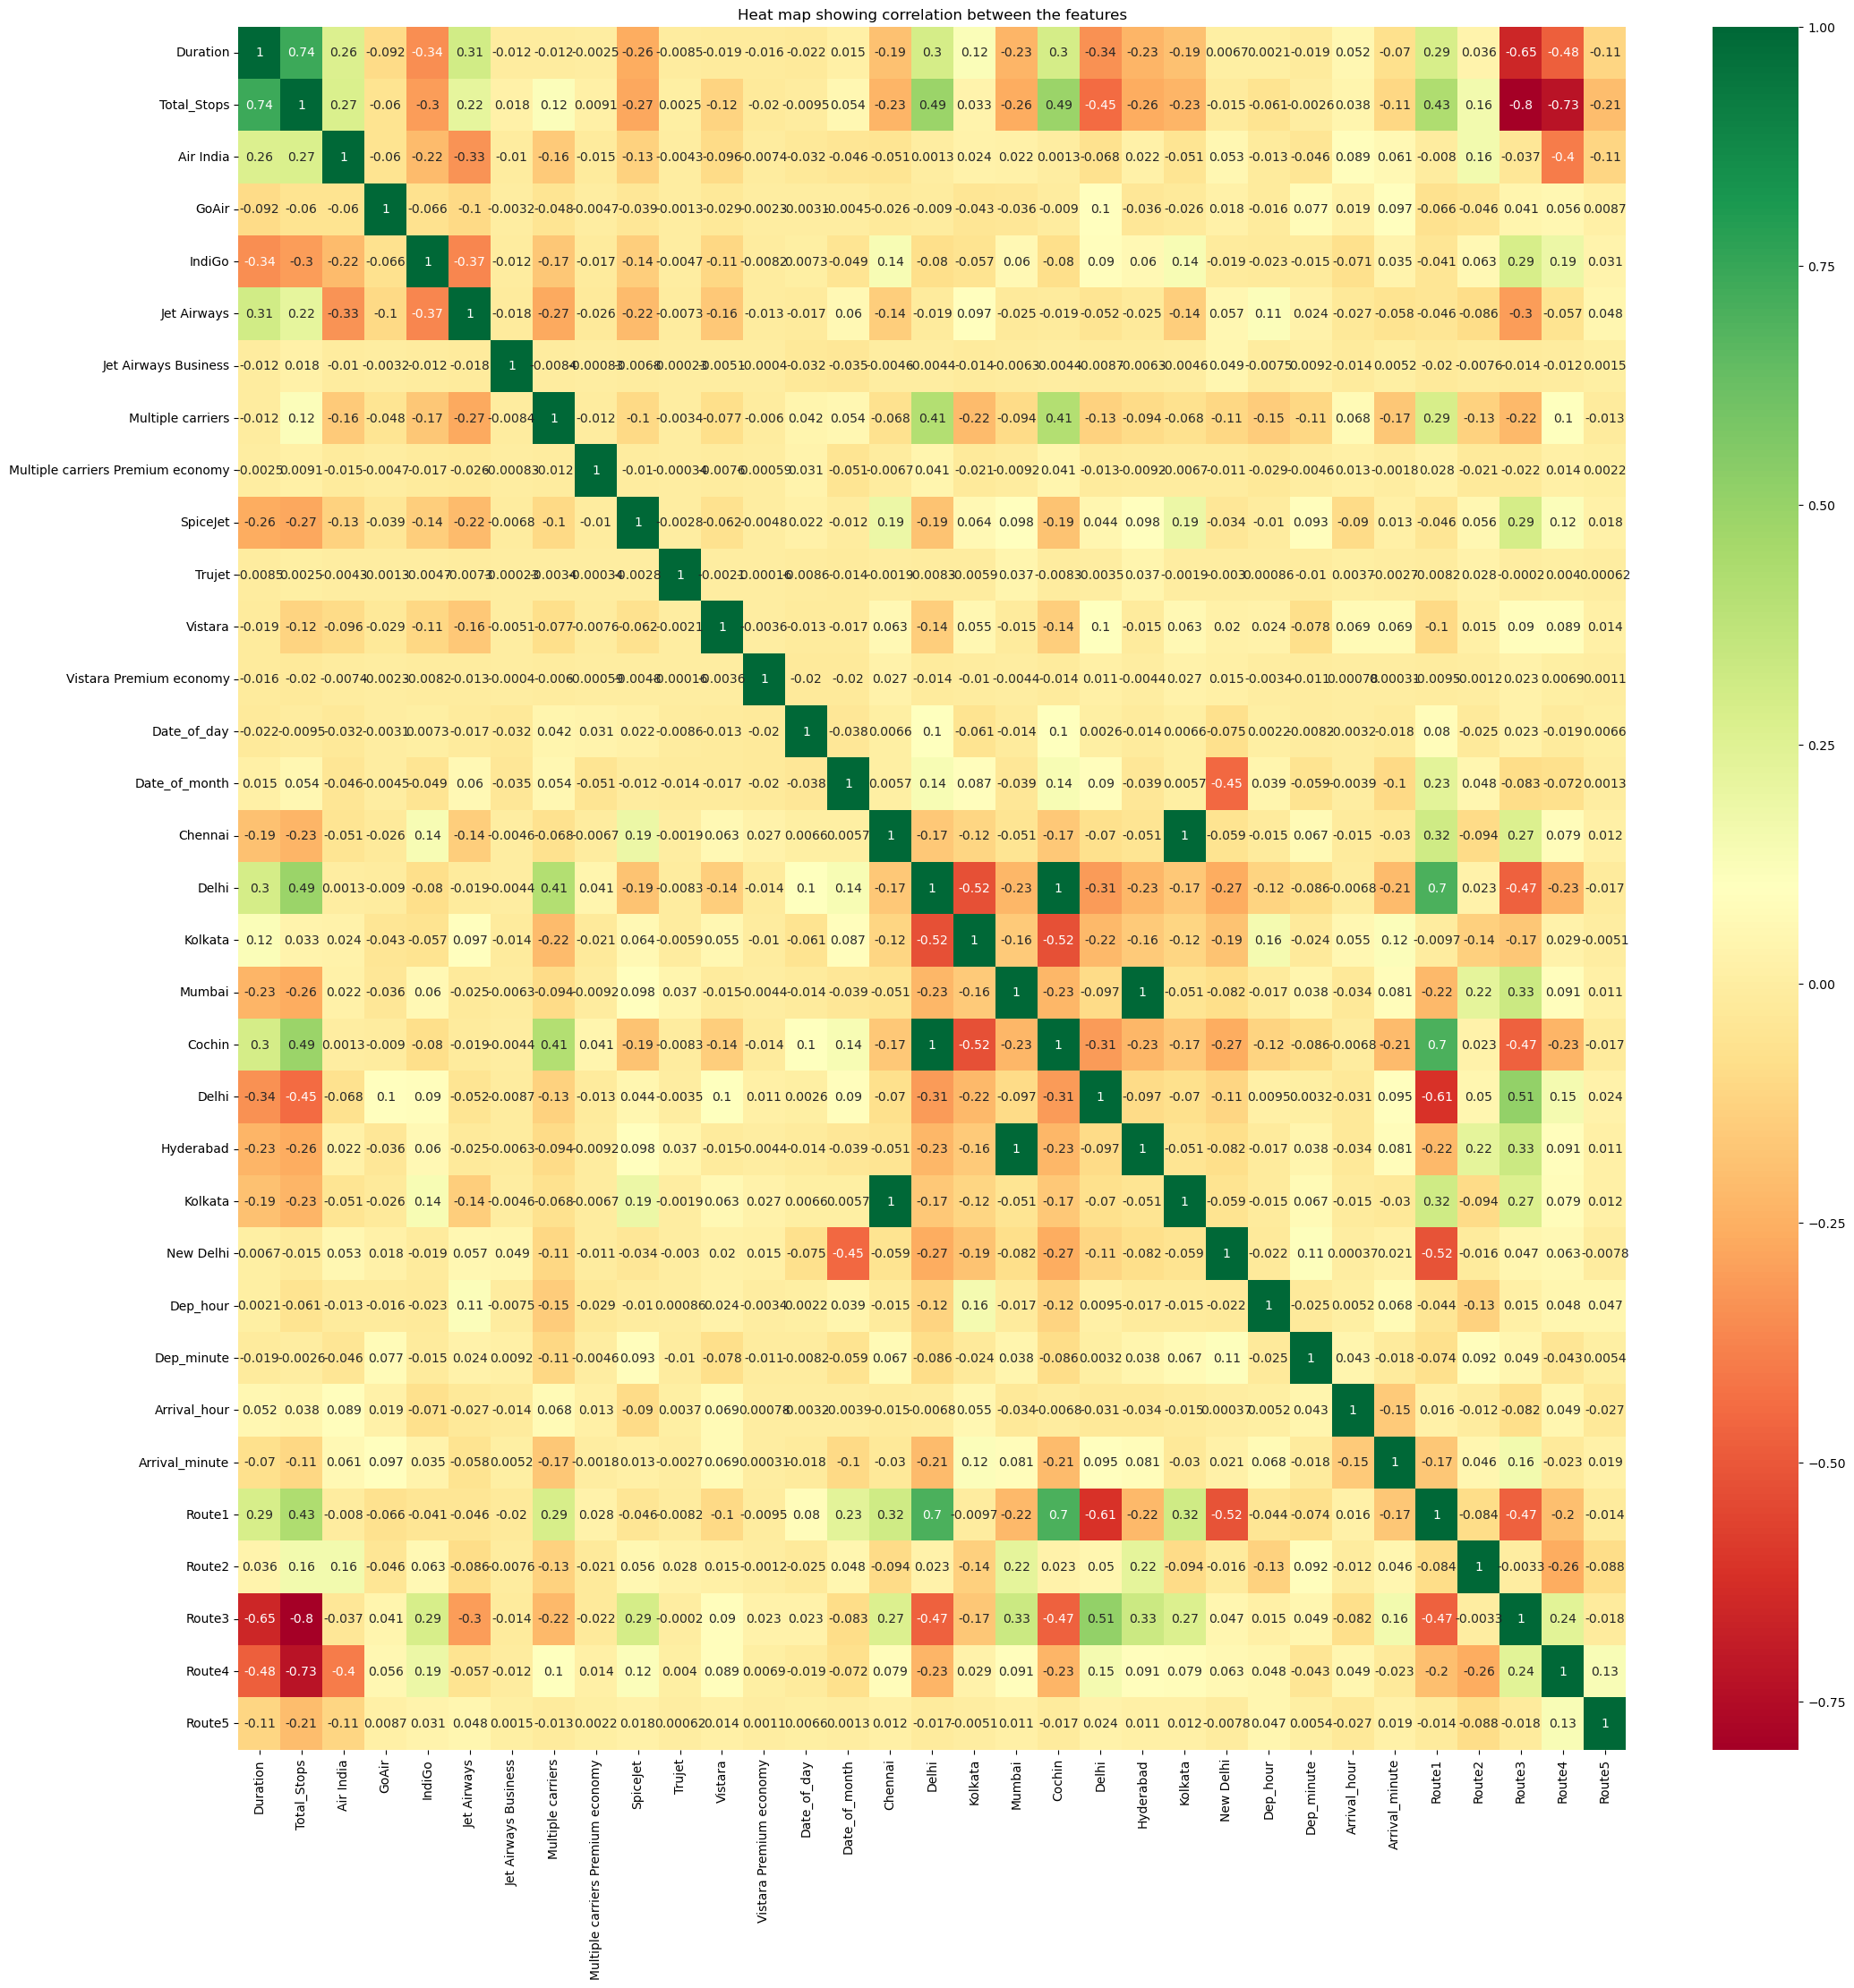

In [1209]:
plt.figure(figsize = (25, 25))
sns.heatmap(data.drop('Price', axis = 1).corr(), annot = True, cmap = 'RdYlGn')
plt.title("Heat map showing correlation between the features")

### Insights

* above heatmap there 3 columns has correlated with 1 kolakata-chennai,hydarabd and mumbai,chocin and delhi has high positivly correleted
* among this we have to drop 3 colums outof 6

In [1210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Duration                           10682 non-null  int64  
 1   Total_Stops                        10682 non-null  int64  
 2   Price                              10682 non-null  float64
 3   Air India                          10682 non-null  bool   
 4   GoAir                              10682 non-null  bool   
 5   IndiGo                             10682 non-null  bool   
 6   Jet Airways                        10682 non-null  bool   
 7   Jet Airways Business               10682 non-null  bool   
 8   Multiple carriers                  10682 non-null  bool   
 9   Multiple carriers Premium economy  10682 non-null  bool   
 10  SpiceJet                           10682 non-null  bool   
 11  Trujet                             10682 non-null  bool   


In [1211]:
data.drop(["Cochin","Hyderabad","Kolkata"],axis=1,inplace=True)

In [1212]:
data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Date_of_day', 'Date_of_month', 'Chennai',
       'Delhi', 'Mumbai', 'Delhi', 'New Delhi', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5'],
      dtype='object')

In [1213]:
data

,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,170,0,8.267962,False,False,True,False,False,False,False,...,True,22,20,1,10,0,13,29,13,5
1,445,2,8.944028,True,False,False,False,False,False,False,...,False,5,50,13,15,2,25,1,3,5
2,1140,2,9.538348,False,False,False,True,False,False,False,...,False,9,25,4,25,3,32,4,5,5
3,325,1,8.735204,False,False,True,False,False,False,False,...,False,18,5,23,30,2,34,3,13,5
4,285,1,9.495670,False,False,True,False,False,False,False,...,True,16,50,21,35,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,8.320448,False,False,False,False,False,False,False,...,False,19,55,22,25,2,5,29,13,5
10679,155,0,8.329658,True,False,False,False,False,False,False,...,False,20,45,23,20,2,5,29,13,5
10680,180,0,8.885856,False,False,False,True,False,False,False,...,False,8,20,11,20,0,13,29,13,5
10681,160,0,9.445254,False,False,False,False,False,False,False,...,True,11,30,14,10,0,13,29,13,5


## Duplicates

In [1214]:
data.duplicated().sum()

222

In [1215]:
data.drop_duplicates(inplace=True)

# Data Analysis Report

## Introduction

This data analysis report is based on a dataset containing information about airline journeys. The dataset includes various features such as the date of the journey, source, destination, route, departure time, arrival time, duration, total stops, and additional information. The dataset consists of 10,683 records.

## Data Summary

Here is a summary of the key statistics and characteristics of the dataset:

- **Total Records**: 10,683
- **Features**:
    - Date_of_Journey
    - Source
    - Destination
    - Route
    - Dep_Time (Departure Time)
    - Arrival_Time
    - Duration
    - Total_Stops
    - Additional_Info

### Unique Values

- **Date_of_Journey**: 12 unique dates
- **Source**: 44 unique sources
- **Destination**: 5 unique destinations
- **Route**: 6 unique routes
- **Dep_Time**: 128 unique departure times
- **Arrival_Time**: 222 unique arrival times
- **Duration**: 1,343 unique durations
- **Total_Stops**: 5 unique values
- **Additional_Info**: 10 unique additional information

### Most Common Values

- **Airline**: The most common airline is "Jet Airways" with 3,849 occurrences.
- **Date_of_Journey**: The most common journey date is "18/05/2019" with 504 occurrences.
- **Source**: The most common source is "Delhi" with 4,537 occurrences.
- **Destination**: The most common destination is "Cochin" with 4,537 occurrences.
- **Route**: The most common route is "DEL → BOM → COK" with 2,376 occurrences.
- **Dep_Time**: The most common departure time is "18:55" with 233 occurrences.
- **Arrival_Time**: The most common arrival time is "19:00" with 423 occurrences.
- **Duration**: The most common duration is "2h 50m" with 5,625 occurrences.
- **Total_Stops**: The most common number of stops is "1 stop" with 8,345 occurrences.
- **Additional_Info**: The most common additional information is "No info" with 8,345 occurrences.

## Insights

1. **Jet Airways**: Jet Airways is the most frequently occurring airline in the dataset, indicating it is a popular choice among travelers.

2. **Date Distribution**: The dataset is skewed towards the date "18/05/2019," which may be due to the dataset collection process.

3. **Source and Destination**: The most common source and destination are "Delhi" and "Cochin," respectively. This suggests that Delhi to Cochin route may be a popular one.

4. **Route**: The most common route is "DEL → BOM → COK," indicating that this particular route is commonly taken by passengers.

5. **Departure and Arrival Times**: The dataset includes a wide range of departure and arrival times, which suggests flights are available throughout the day.

6. **Duration**: The most common duration is "2h 50m," indicating that this duration is typical for many flights in the dataset.

7. **Total Stops**: Most flights have "1 stop," which suggests that direct flights are the most common, followed by one-stop flights.

8. **Additional Information**: The "No info" category is prevalent in the dataset, suggesting that there is missing or unspecified information for a significant number of records.

## Conclusion

This data analysis report provides an overview of the given airline journey dataset. It highlights the most common values for various features and provides insights into the dataset's characteristics. Further analysis, such as data cleaning and feature engineering, may be necessary for more in-depth analysis and modeling. Additionally, it's important to address missing or unspecified information in the dataset for more accurate analysis and predictions.

# Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

                              Feature  Importance
0                            Duration    0.613079
13                        Date_of_day    0.082673
5                         Jet Airways    0.060796
14                      Date_of_month    0.049326
25                             Route2    0.022222
20                           Dep_hour    0.018595
21                         Dep_minute    0.016649
22                       Arrival_hour    0.015500
27                             Route4    0.014457
4                              IndiGo    0.014416
7                   Multiple carriers    0.013329
23                     Arrival_minute    0.012864
19                          New Delhi    0.010045
2                           Air India    0.007910
24                             Route1    0.007819
9                            SpiceJet    0.007348
1                         Total_Stops    0.006659
26                             Route3    0.005761
6                Jet Airways Business    0.005229


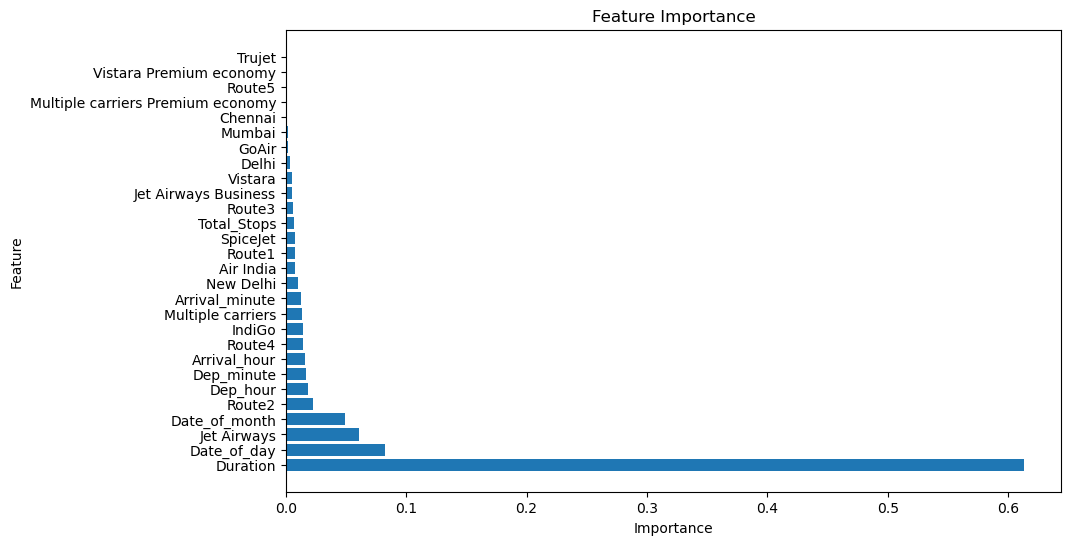

In [1216]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'data'
# Extract features and target variable
features = data.drop('Price', axis=1)
target = data['Price']

# Convert categorical variables to dummy/indicator variables (if needed)
features = pd.get_dummies(features)

# Initialize a Random Forest Regressor
RF1_model = RandomForestRegressor(random_state=42)

# Fit the model
RF1_model.fit(features, target)

# Get feature importances
feature_importances = RF1_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_data = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_data)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_data['Feature'], feature_importance_data['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Insights

* we used Feature Engineering method like RandomForestRegresson 
* In Above code we found what are feature is crucial for model
* we selected importent feature for more effected for accuracy of our model

## Model Creation

In [1217]:
# Split data into train and test
from sklearn.model_selection import train_test_split

In [1218]:
# Select unnecessary feature columns 
#d1=data[['Trujet','Vistara Premium economy','Route5','Price']]

In [1219]:
# drop target columns for x variable 
# select target variable
x=data.drop('Price',axis=1)
y=data['Price']


In [1220]:
data

,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,170,0,8.267962,False,False,True,False,False,False,False,...,True,22,20,1,10,0,13,29,13,5
1,445,2,8.944028,True,False,False,False,False,False,False,...,False,5,50,13,15,2,25,1,3,5
2,1140,2,9.538348,False,False,False,True,False,False,False,...,False,9,25,4,25,3,32,4,5,5
3,325,1,8.735204,False,False,True,False,False,False,False,...,False,18,5,23,30,2,34,3,13,5
4,285,1,9.495670,False,False,True,False,False,False,False,...,True,16,50,21,35,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,8.320448,False,False,False,False,False,False,False,...,False,19,55,22,25,2,5,29,13,5
10679,155,0,8.329658,True,False,False,False,False,False,False,...,False,20,45,23,20,2,5,29,13,5
10680,180,0,8.885856,False,False,False,True,False,False,False,...,False,8,20,11,20,0,13,29,13,5
10681,160,0,9.445254,False,False,False,False,False,False,False,...,True,11,30,14,10,0,13,29,13,5


In [1221]:
x.columns

Index(['Duration', 'Total_Stops', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Date_of_day', 'Date_of_month', 'Chennai',
       'Delhi', 'Mumbai', 'Delhi', 'New Delhi', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Route1', 'Route2', 'Route3',
       'Route4', 'Route5'],
      dtype='object')

In [1222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Duration                           10460 non-null  int64  
 1   Total_Stops                        10460 non-null  int64  
 2   Price                              10460 non-null  float64
 3   Air India                          10460 non-null  bool   
 4   GoAir                              10460 non-null  bool   
 5   IndiGo                             10460 non-null  bool   
 6   Jet Airways                        10460 non-null  bool   
 7   Jet Airways Business               10460 non-null  bool   
 8   Multiple carriers                  10460 non-null  bool   
 9   Multiple carriers Premium economy  10460 non-null  bool   
 10  SpiceJet                           10460 non-null  bool   
 11  Trujet                             10460 non-null  bool   


In [1223]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8368, 29)
(2092, 29)
(8368,)
(2092,)


In [1224]:
x

,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,New Delhi,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route1,Route2,Route3,Route4,Route5
0,170,0,False,False,True,False,False,False,False,False,...,True,22,20,1,10,0,13,29,13,5
1,445,2,True,False,False,False,False,False,False,False,...,False,5,50,13,15,2,25,1,3,5
2,1140,2,False,False,False,True,False,False,False,False,...,False,9,25,4,25,3,32,4,5,5
3,325,1,False,False,True,False,False,False,False,False,...,False,18,5,23,30,2,34,3,13,5
4,285,1,False,False,True,False,False,False,False,False,...,True,16,50,21,35,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,False,False,False,False,False,False,False,False,...,False,19,55,22,25,2,5,29,13,5
10679,155,0,True,False,False,False,False,False,False,False,...,False,20,45,23,20,2,5,29,13,5
10680,180,0,False,False,False,True,False,False,False,False,...,False,8,20,11,20,0,13,29,13,5
10681,160,0,False,False,False,False,False,False,False,False,...,True,11,30,14,10,0,13,29,13,5


### Outlier Detection 

In [1225]:
from sklearn.ensemble import IsolationForest
outlier_detection=IsolationForest(contamination=0.05)
outlier=outlier_detection.fit_predict(x_train)
x_train_no_outlier=x_train[outlier != -1]
y_train_no_outlier=y_train[outlier != -1]
print(x_train_no_outlier)
print(y_train_no_outlier)

      Duration  Total_Stops  Air India  GoAir  IndiGo  Jet Airways  \
3487      1855            2       True  False   False        False   
611       1215            1       True  False   False        False   
6632       520            1      False  False   False         True   
4566      1490            2       True  False   False        False   
511         85            0      False  False   False        False   
...        ...          ...        ...    ...     ...          ...   
5799       170            0      False  False    True        False   
5247       860            1      False  False   False         True   
5452       300            1      False  False    True        False   
861        195            0      False  False    True        False   
7368      1125            2      False  False   False         True   

      Jet Airways Business  Multiple carriers  \
3487                 False              False   
611                  False              False   
6632        

# Model Building

# 1) Linear Regression

In [1226]:
from sklearn.feature_selection import SelectKBest,f_regression
k=20
selector=SelectKBest(f_regression,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

In [1227]:
x_test_selected

array([[ 600,    1,    0, ...,    7,    6,   13],
       [ 695,    1,    0, ...,    7,    8,   13],
       [1040,    1,    0, ...,    7,    6,   13],
       ...,
       [ 140,    0,    0, ...,    8,   29,   13],
       [ 550,    1,    0, ...,    7,    6,   13],
       [ 660,    1,    0, ...,    7,    6,   13]], dtype=int64)

In [1228]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X = x_train_selected[:, :-1]
Y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model1= LinearRegression()
model1.fit(X_train_scaled, Y_train)

# Make predictions on the test set
Y_test_LR = model1.predict(X_test_scaled)
Y_train_LR=model1.predict(X_train_scaled)


### Model Evaluation

In [1229]:
# Evaluate the model using mean squared error
mse = mean_squared_error(Y_test_LR, Y_test)
print(f"Mean Squared Error: {mse}")

LR=r2_score(Y_test_LR,Y_test)
print("r2 score test",LR)
r2_score_train=r2_score(Y_train_LR,Y_train)
print("r2 score train",r2_score_train)

Mean Squared Error: 0.9058492621987587
r2 score test 0.8549829846371364
r2 score train 0.862105802246913


### Report
* The Residue by our model is less than the Residue by the dumb model so we get Positive r2, so it is considered to be a Good Model.
* The r2 statistic provides a measure of fit. Here the r2 statistic =85, it says that our model fits only 85% of the total data set.
* Since the percentage is very less and we have to improve it to 100% , we apply the next model to the given data set.

# 2) Polynomial Regression

* Polynomial regression is used fit the non linear data to linear giving power to each feature as new feature 
* train the linear model on extended set of features

In [1230]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model2= LinearRegression()
model2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_poly = model2.predict(X_test_scaled)
y_train_poly=model2.predict(X_train_scaled)


### Model Evaluation

In [1231]:
# Evaluate the model using mean squared error
print("Polynomial result")
mse2=mean_squared_error(y_test,y_test_poly)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_poly)
print('r2_score_train:',r2_score1)
POLY=r2_score(y_test,y_test_poly)
print('r2_score_test:',POLY)

Polynomial result
msc_test 0.9058492621987587
r2_score_train: 0.8788262708146513
r2_score_test: 0.8785623193872445


### Report
* The Residue by our model is less than the Residue by the dumb model so we get Positive r2, so it is considered to be a Good Model.
* The r2 statistic provides a measure of fit. Here the r2 statistic =0.99, it says that our model fits only 99% of the total data set.
* Since the percentage is very less and we have to improve it to 100% , we apply the next model to the given data set.
* Better than the Linear regression

# 3) Decision Tree and Random Forest

- We see the implementation of Decision tree and Random forest for the given data frame.
- **Random forest** is **supervised** machine learning made up of **Decision trees**.
- It can be used for both Regression and Classification problems.

## Decision Tree

from sklearn.preprocessing import PolynomialFeatures
degree=2
poly_feature=PolynomialFeatures(degree,include_bias=False)
x_train_poly=poly_feature.fit_transform(x_train)
x_test_poly=poly_feature.transform(x_test)
x_test_poly

In [1232]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model3 =DecisionTreeRegressor()
model3.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_tree = model3.predict(X_test_scaled)
y_train_tree=model3.predict(X_train_scaled)

### Model evaluation

In [1233]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [1234]:
print("Decision Tree result")
mse1=mean_squared_error(y_train,y_train_tree)
print("msc_train",mse1)
mse2=mean_squared_error(y_test,y_test_tree)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_tree)
print('r2_score_train:',r2_score1)
Tree=r2_score(y_test,y_test_tree)
print('r2_score_test:',Tree)

Decision Tree result
msc_train 0.0
msc_test 0.0
r2_score_train: 1.0
r2_score_test: 1.0


## Random Forest Implementaion

In [1235]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model4= RandomForestRegressor()
model4.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_RF= model4.predict(X_test_scaled)
y_train_RF=model4.predict(X_train_scaled)

### Model Evaluation

In [1236]:
print("Decision Tree result")
mse1=mean_squared_error(y_train,y_train_RF)
print("msc_train",mse1)
mse2=mean_squared_error(y_test,y_test_RF)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_RF)
print('r2_score_train:',r2_score1)
random_forest=r2_score(y_test,y_test_RF)
print('r2_score_test:',random_forest)

Decision Tree result
msc_train 0.004721631311622348
msc_test 0.0064970728793309444
r2_score_train: 0.9994172014722488
r2_score_test: 0.9991290057914018


### Report
- As Decision Tree and Random Forest is applied for both regression and classification problem here we have used the regressor.
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.87**, it says that our model fits only **87%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 4) Support Vector Machine

In [1237]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model5= SVR()
model5.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_SVM = model5.predict(X_test_scaled)
y_train_SVM=model5.predict(X_train_scaled)

In [1238]:
print("Decision Tree result")
mse1=mean_squared_error(y_train,y_train_SVM)
print("msc_train",mse1)
mse2=mean_squared_error(y_test,y_test_SVM)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_SVM)
print('r2_score_train:',r2_score1)
SVM=r2_score(y_test,y_test_SVM)
print('r2_score_test:',SVM)

Decision Tree result
msc_train 0.20432180159084437
msc_test 0.1882367318543901
r2_score_train: 0.9747802322342494
r2_score_test: 0.9747650817013012


### Report
- As Support vector machine is applied for both regression and classification problem here we have used the regressor.
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.97**, it says that our model fits only **97%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 5) K-Nearest Neighbours

- KNN is **supervised** machine learning.
- It is used for both **regression** and **classification** problems.
- And also it will work for both **linear** and **non-linear** data.

### Model creation

In [1239]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model6= KNeighborsRegressor()
model6.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_KNN = model6.predict(X_test_scaled)
y_train_KNN=model6.predict(X_train_scaled)

### Model Evaluation

In [1240]:
print("Decision Tree result")
mse1=mean_squared_error(y_train,y_train_KNN)
print("msc_train",mse1)
mse2=mean_squared_error(y_test,y_test_KNN)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_KNN)
print('r2_score_train:',r2_score1)
KNN=r2_score(y_test,y_test_KNN)
print('r2_score_test:',KNN)

Decision Tree result
msc_train 0.07545264415894831
msc_test 0.09842293906810036
r2_score_train: 0.9906867590820726
r2_score_test: 0.9868054720158307


### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.98**, it says that our model fits only **98%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

# 6) Gradient Boosting

- Gradient Boosting is a type of machine learning boosting the key role is to minimize the overall prediction error.
- XGBoost is a **Decision Tree** based ensemble Machine Learning algorithm that uses a **gradient boosting** framework.
- And it has a wide range of applications as it can be applied to solve Regression and Classification problems.
- XGBoost is designed for **speed** and **performance**.

## Gradient Boosting

In [1241]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

# Assuming your_array is your NumPy array
X =x_train_selected[:, :-1]
y =x_train_selected[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data if needed (scaling in this case)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the regression model
model7= GradientBoostingRegressor()
model7.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_GB= model7.predict(X_test_scaled)
y_train_GB=model7.predict(X_train_scaled)

### Model Evaluation

In [1242]:
print("Gradient Bossting")
mse1=mean_squared_error(y_train,y_train_GB)
print("msc_train",mse1)
mse2=mean_squared_error(y_test,y_test_GB)
print("msc_test",mse2)

r2_score1=r2_score(y_train,y_train_GB)
print('r2_score_train:',r2_score1)
GB=r2_score(y_test,y_test_GB)
print('r2_score_test:',GB)

Gradient Bossting
msc_train 0.002740620502070392
msc_test 0.006149769167704083
r2_score_train: 0.9996617208146261
r2_score_test: 0.9991755651462175


### Report
- The Residue by our model is less than the Residue by the dumb model so we get **Positive r2**, so it is considered to be a **Good Model**.
- The **r2 statistic** provides a measure of fit. Here the **r2 statistic =0.99**, it says that our model fits only **99%** of the total data set.
- To improve and fit the model **100%** , we apply the next model to the given data set.

In [1246]:
scores=[LR, POLY,Tree,random_forest,SVM,KNN,GB]

algorithms=['Linear Regression','Polynomail Regression','Decision Tree','Random Forest','Support vector machine','KNN','Gradient Boosting']
        
for i in range(len(algorithms)): 
    print(algorithms[i] +" = " +str(scores[i]))

Linear Regression = 0.8549829846371364
Polynomail Regression = 0.8785623193872445
Decision Tree = 1.0
Random Forest = 0.9991290057914018
Support vector machine = 0.9747650817013012
KNN = 0.9868054720158307
Gradient Boosting = 0.9991755651462175


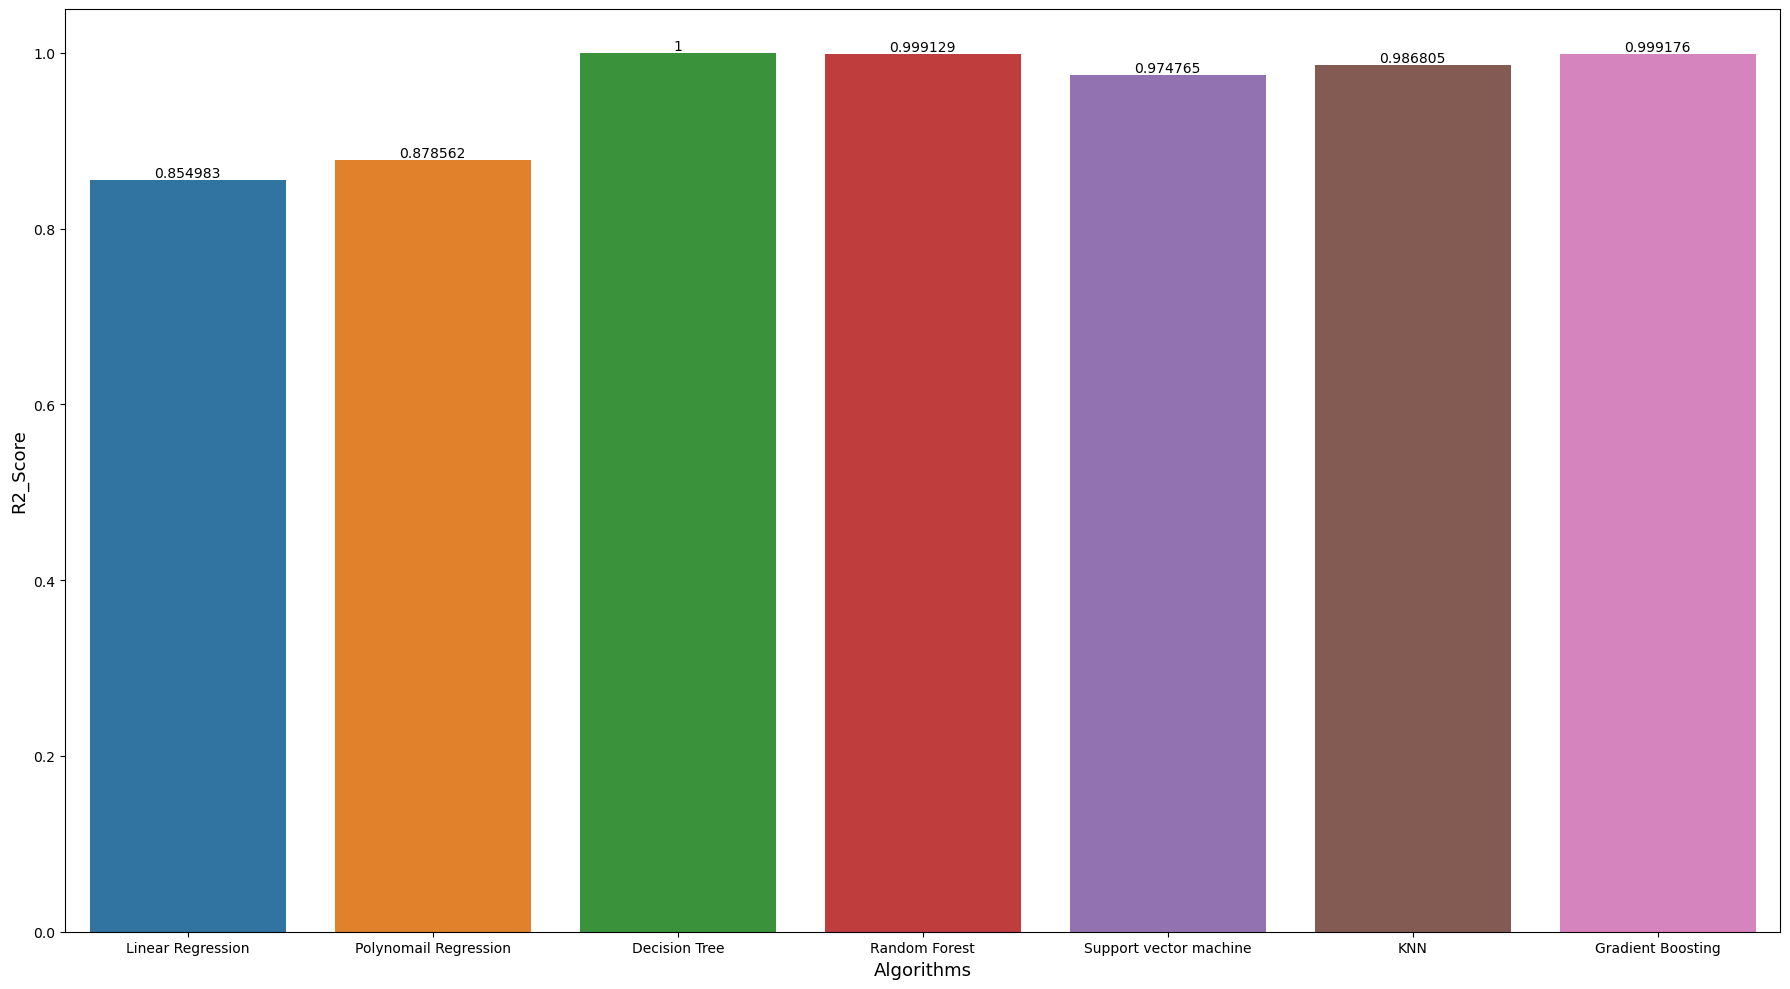

In [1251]:
plt.figure(figsize=(18,10))

ax=sns.barplot(x=algorithms,y=scores)

plt.xlabel("Algorithms", fontsize=(13))
plt.ylabel("R2_Score", fontsize=(13))

for label in ax.containers:ax.bar_label(label)

plt.tight_layout()

# Conclusion

Thus we can conclude that **Random forest** algorithm and **Gradient boosting** yields highest **r2_score** of 99% out of all the other algorithms used. 

# Challenges Faced in Data Analysis and Techniques Used

## Introduction

During the process of analyzing the airline journey dataset, several challenges were encountered. This report outlines these challenges and explains the techniques and methods used to address them effectively.

## Challenges

### 1. Missing Data

**Challenge**: One of the significant challenges was the presence of missing data, particularly in the "Total_Stops" and "Route" columns. This missing data could potentially affect the quality and accuracy of the analysis.

**Technique Used**:
   - **Data Imputation**: Missing values in the "Total_Stops" and "Route" columns have only one missing value if we drop that missing value it is not much effect to the model.
   
### 2. Date Formatting

**Challenge**: The "Date_of_Journey" column was not in a standard date format, which made it challenging to perform date-based analyses.

**Technique Used**:
   - **Date Parsing**: The "Date_of_Journey" column was converted to a standardized date format (e.g., YYYY-MM-DD) to facilitate date-based calculations and comparisons. This was done by to_datetime function extracting day, month, and then reformatting it.

### 3. Duration Data

**Challenge**: The "Duration" column contained values in a non-standard format (e.g., "2h 50m"). Extracting meaningful insights from this column required converting it into a numeric format.

**Technique Used**:
   - **Duration Conversion**: The "Duration" column was transformed into a numeric format, representing the total duration of the journey in minutes. This involved splitting the string, extracting hours and minutes, and converting them into minutes for easy analysis.

### 4. Categorical Data

**Challenge**: Several columns, such as "Airline," "Source," "Destination," and "Total_Stops," contained categorical data. To analyze these variables effectively, they needed to be encoded into a numerical format.

**Technique Used**:
   - **One-Hot Encoding**: For columns like "Airline," "Source," and "Destination," one-hot encoding was applied to create binary columns for each category. This preserves the information without introducing any ordinality.   
      # or
   - **Mannual Encoder**: For the "Total_Stops" column, label encoding was used because it represents an ordinal variable with a natural order ("1 stop" =1 "2 stops" =2 "3 stops" =3 "4 stops" =4 "non-stop"=0).

## Conclusion

Data analysis often involves overcoming challenges related to data quality, formatting, and type. In this analysis of the airline journey dataset, challenges like missing data, date formatting, duration data, and categorical variables were successfully addressed using appropriate techniques. These steps were crucial to ensure that the analysis provided meaningful and accurate insights from the dataset. It highlights the importance of data preprocessing and cleaning in the data analysis process to obtain reliable results.